https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import *

# Узнаем корреляции связанные с продолжительностью жизни по странам и годам.

In [2]:
df = pd.read_csv("Life-Expectancy-Data-Updated.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [3]:
df.shape

(2864, 21)

### Описание каждого столбца:

Country:
Список из 179 стран

Region:
179 стран распределены по 9 регионам. Например, Африка, Азия, Океания, Европейский союз, Остальная Европа и т.д.

Year:
Годы наблюдения с 2000 по 2015 год

Infant_deaths:
Представляет собой младенческую смертность на 1000 населения

Under_five_deaths:
Представляет собой смертность детей в возрасте до пяти лет на 1000 населения

Adult_mortality:
Отражает смертность взрослых на 1000 человек населения

Alcohol_consumption:
Представляет собой потребление алкоголя, выраженное в литрах чистого алкоголя на душу населения в возрасте старше 15 лет.

Hepatitis_B
Представляет собой % охвата иммунизацией против гепатита В (HepB3) среди детей в возрасте 1 года.

Measles:
Представляет собой % охвата иммунизацией первой дозой вакцины против кори, содержащей MCV1, среди детей в возрасте 1 года

BMI:
ИМТ - это показатель состояния питания у взрослых. Он определяется как вес человека в килограммах, деленный на квадрат

Polio:
Представляет собой % охвата иммунизацией против полиомиелита (Pol3) среди детей в возрасте 1 года.

Diphtheria:
Представляет собой % охвата иммунизацией дифтерийно-столбнячным анатоксином и коклюшем (DTP3) среди детей в возрасте 1 года.

Incidents_HIV:
Случаи заражения ВИЧ на 1000 человек населения в возрасте 15-49 лет

GDP_per_capita:
ВВП на душу населения в текущих долларах США

Population_mln:
Общая численность населения в миллионах

Thinness_ten_nineteen_years:
Распространенность худобы среди подростков в возрасте 10-19 лет. ИМТ < -2 стандартных отклонения ниже медианы.

Thinness_five_nine_years:
Распространенность худобы среди детей в возрасте 5-9 лет. ИМТ < -2 стандартных отклонения ниже медианы.

Schooling:
Средние годы, которые люди в возрасте 25 лет и старше провели в формальном образовании

Economy_status_Developed:
Развитая страна

Economy_status_Developing:
Развивающаяся страна

Life_expectancy:
Средняя ожидаемая продолжительность жизни представителей обоих полов в разные годы с 2010 по 2015 год

In [4]:
df.describe()


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


Удалим колонку Economy_status_Developing, так как она хронит значения обратные Economy_status_Developed

In [5]:
df = df.drop(['Economy_status_Developing'],  axis=1)
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,399,11.33,12.8,12.9,1.1,0,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,2515,2.67,2.2,2.3,9.1,0,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,2130,19.39,15.4,15.5,10.3,0,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,7424,3.44,3.3,3.3,11.1,1,71.8


### Посмотрим как менялись среднее и медиана средней продолжительности жизни. Видим, что средняя продолжителность жизни увеличивается с каждым годом.

In [6]:
result = df.groupby('Year')['Life_expectancy'].agg(['mean', 'median'])

print(result)

           mean  median
Year                   
2000  66.360335    69.7
2001  66.650279    69.9
2002  66.886592    70.2
2003  67.170391    70.4
2004  67.549721    70.9
2005  67.856425    71.2
2006  68.221788    71.0
2007  68.588268    71.2
2008  68.991061    71.6
2009  69.388827    71.8
2010  69.777095    72.0
2011  70.177095    72.2
2012  70.521788    72.4
2013  70.877095    72.6
2014  71.216760    72.8
2015  71.463687    73.0


##### Теперь посмотрим на то, как менялась разница в средней продолжительности жизни между развивающимися и развитыми странами. Как видим разница в среднем с каждым годом сокращается, а, что интересно, медианная остается на примерно том же уровне.

In [7]:
result = df[df["Economy_status_Developed"]==1].groupby('Year')['Life_expectancy'].agg(['mean', 'median']) - df[df["Economy_status_Developed"]==0].groupby('Year')['Life_expectancy'].agg(['mean', 'median'])

print(result)


           mean  median
Year                   
2000  12.911153   10.60
2001  12.991968   10.50
2002  12.871241   10.40
2003  12.717910   10.45
2004  12.818919   10.50
2005  12.599239   10.85
2006  12.458927   11.00
2007  12.218405   10.95
2008  12.102455   10.95
2009  11.972402   10.95
2010  11.823658   10.75
2011  11.840693   10.75
2012  11.525428   10.45
2013  11.425048   10.65
2014  11.385268   10.70
2015  10.961572   10.25


## Построим график коррелиций интересующих нас данных.

<Axes: >

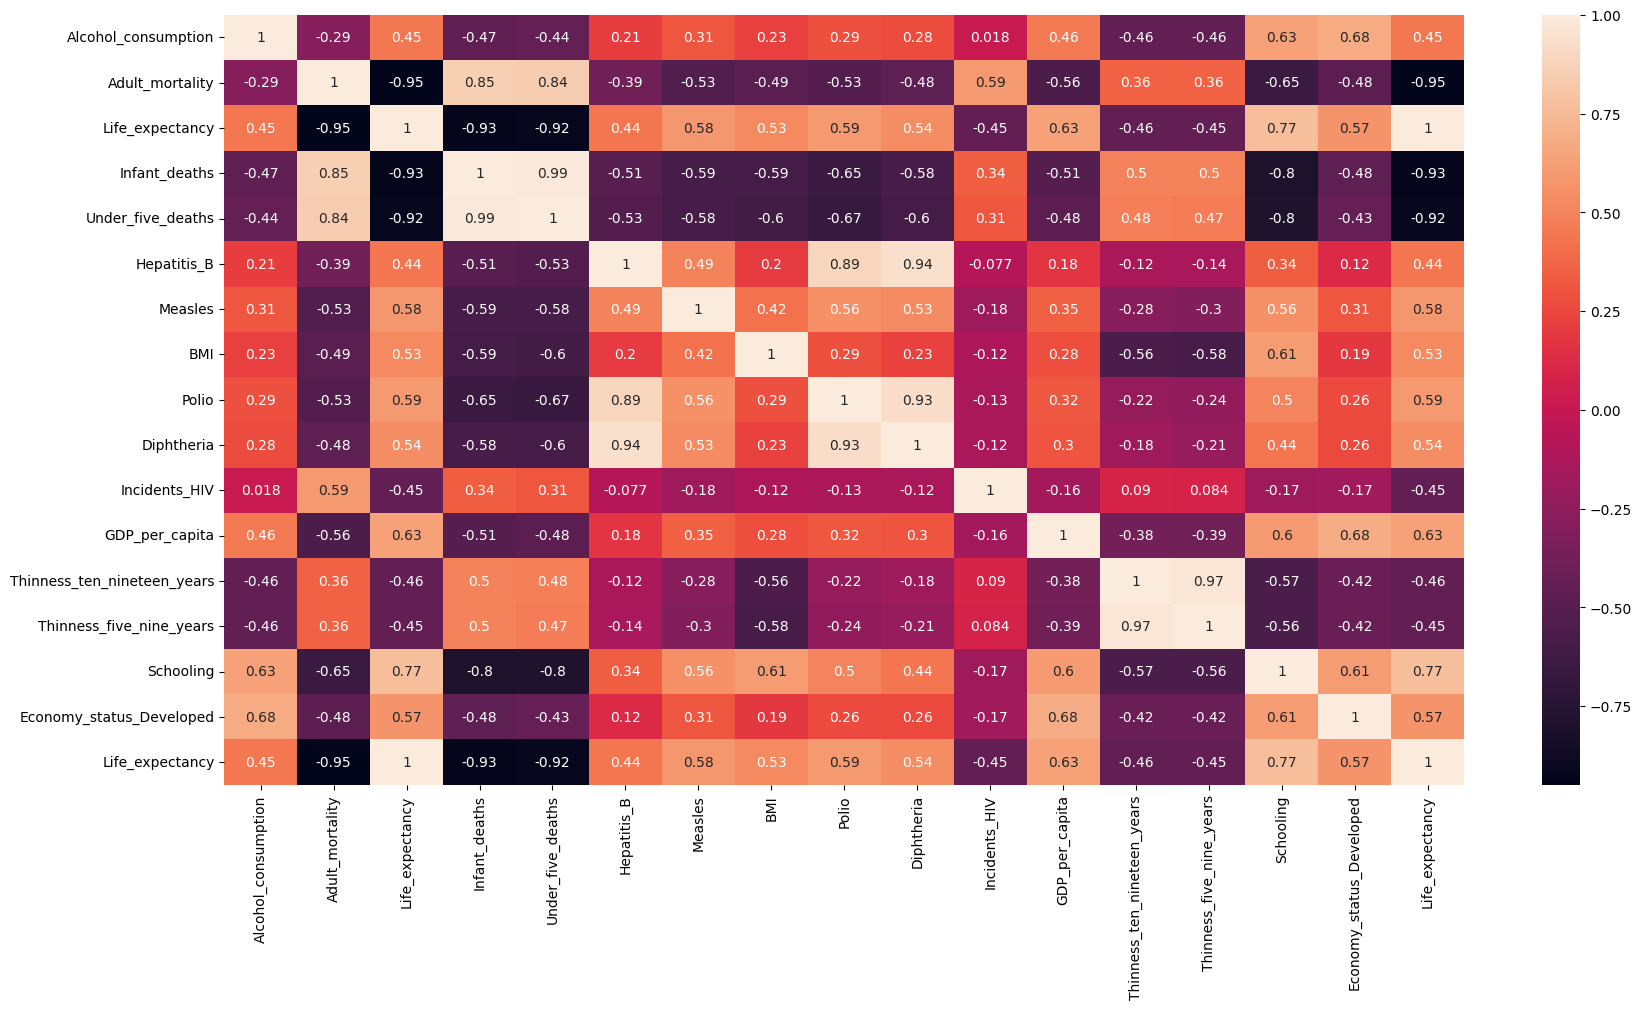

In [8]:
info = df.loc[df['Year'] == 2015, ['Alcohol_consumption', 'Adult_mortality', 'Life_expectancy', 'Infant_deaths', 'Under_five_deaths', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Life_expectancy']]
plt.figure(figsize=(20, 10))
sns.heatmap(info.corr(numeric_only=True), annot=True)

## Посмотрим на неочевидные корреляции.

Странно, что продолжиельность жизни увеличивается с потреблением алкоголя

Узнаем корреляцию между продолжительностью жизни в развитых странах, и потреблением алкоголя. Результат стал другим. 

In [9]:
a = df[df["Economy_status_Developed"] == 1]
corr_matrix = a["Alcohol_consumption"].corr(a["Life_expectancy"])
corr_matrix

-0.41568372449966895

Но в развивающихся странах корреляция положительная. Скорее всего это связано с тем, что алкоголь - не самое дешевое удовольстве

In [10]:
a = df[df["Economy_status_Developed"] == 0]
corr_matrix = a["Alcohol_consumption"].corr(a["Life_expectancy"])
corr_matrix

0.11514006296008991

В целом остальные корреляции вполне логичны, поэтому проверим на нормальное распределение среднюю продолжтельномть жизни. Как видим, оно не нормально.

Text(0.5, 1.0, 'Life_expectancy')

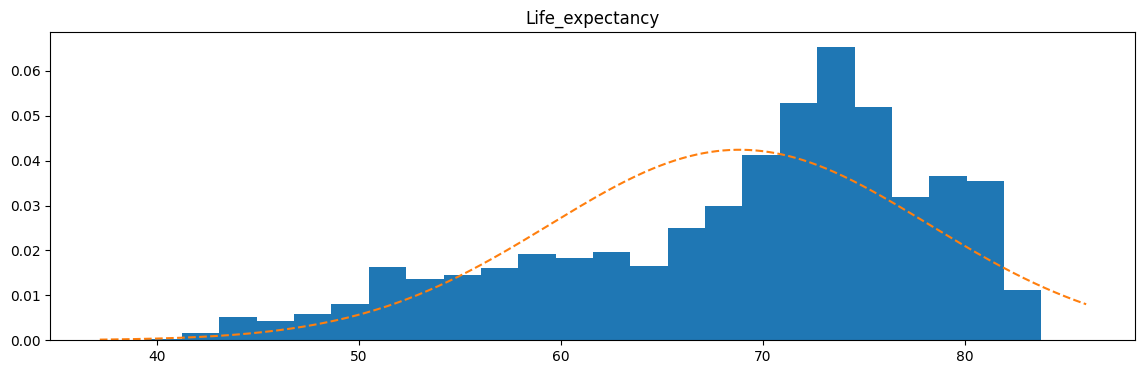

In [11]:
norm = df["Life_expectancy"]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 4)


ax.hist(norm, density=True, bins=24)

loc = norm.mean()
scale = norm.std()

x_left, x_right = ax.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)

ax.plot(x, y, linestyle='dashed')
ax.set_title("Life_expectancy")

Text(0, 0.5, 'квантили выборки')

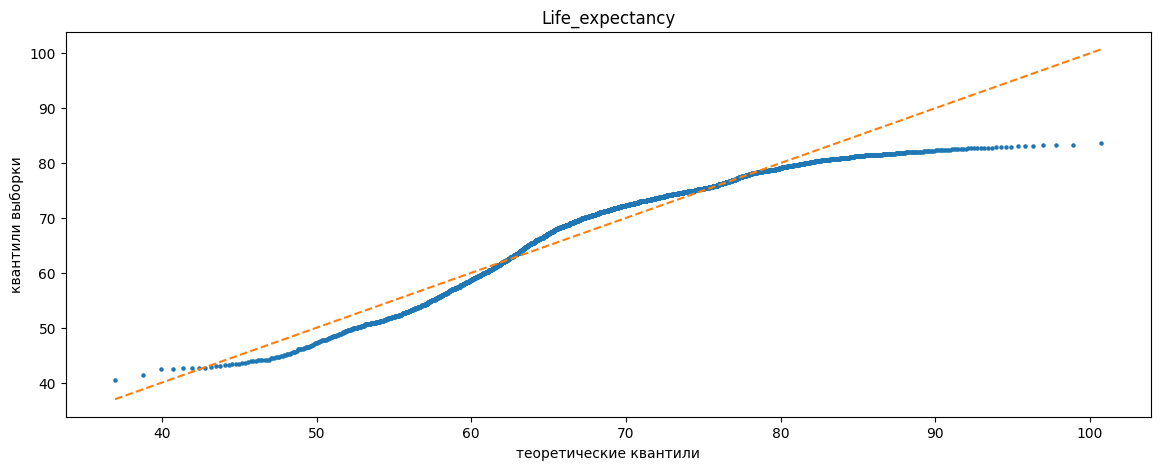

In [12]:

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 5)

loc = norm.mean()
scale = norm.std()

interval = np.linspace(0, 1, norm.shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(norm, interval)

ax.scatter(x, y, s=5)
ax.plot(x, x, color='C1', linestyle='dashed')

ax.set_title("Life_expectancy")
ax.set_xlabel('теоретические квантили')
ax.set_ylabel('квантили выборки')

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


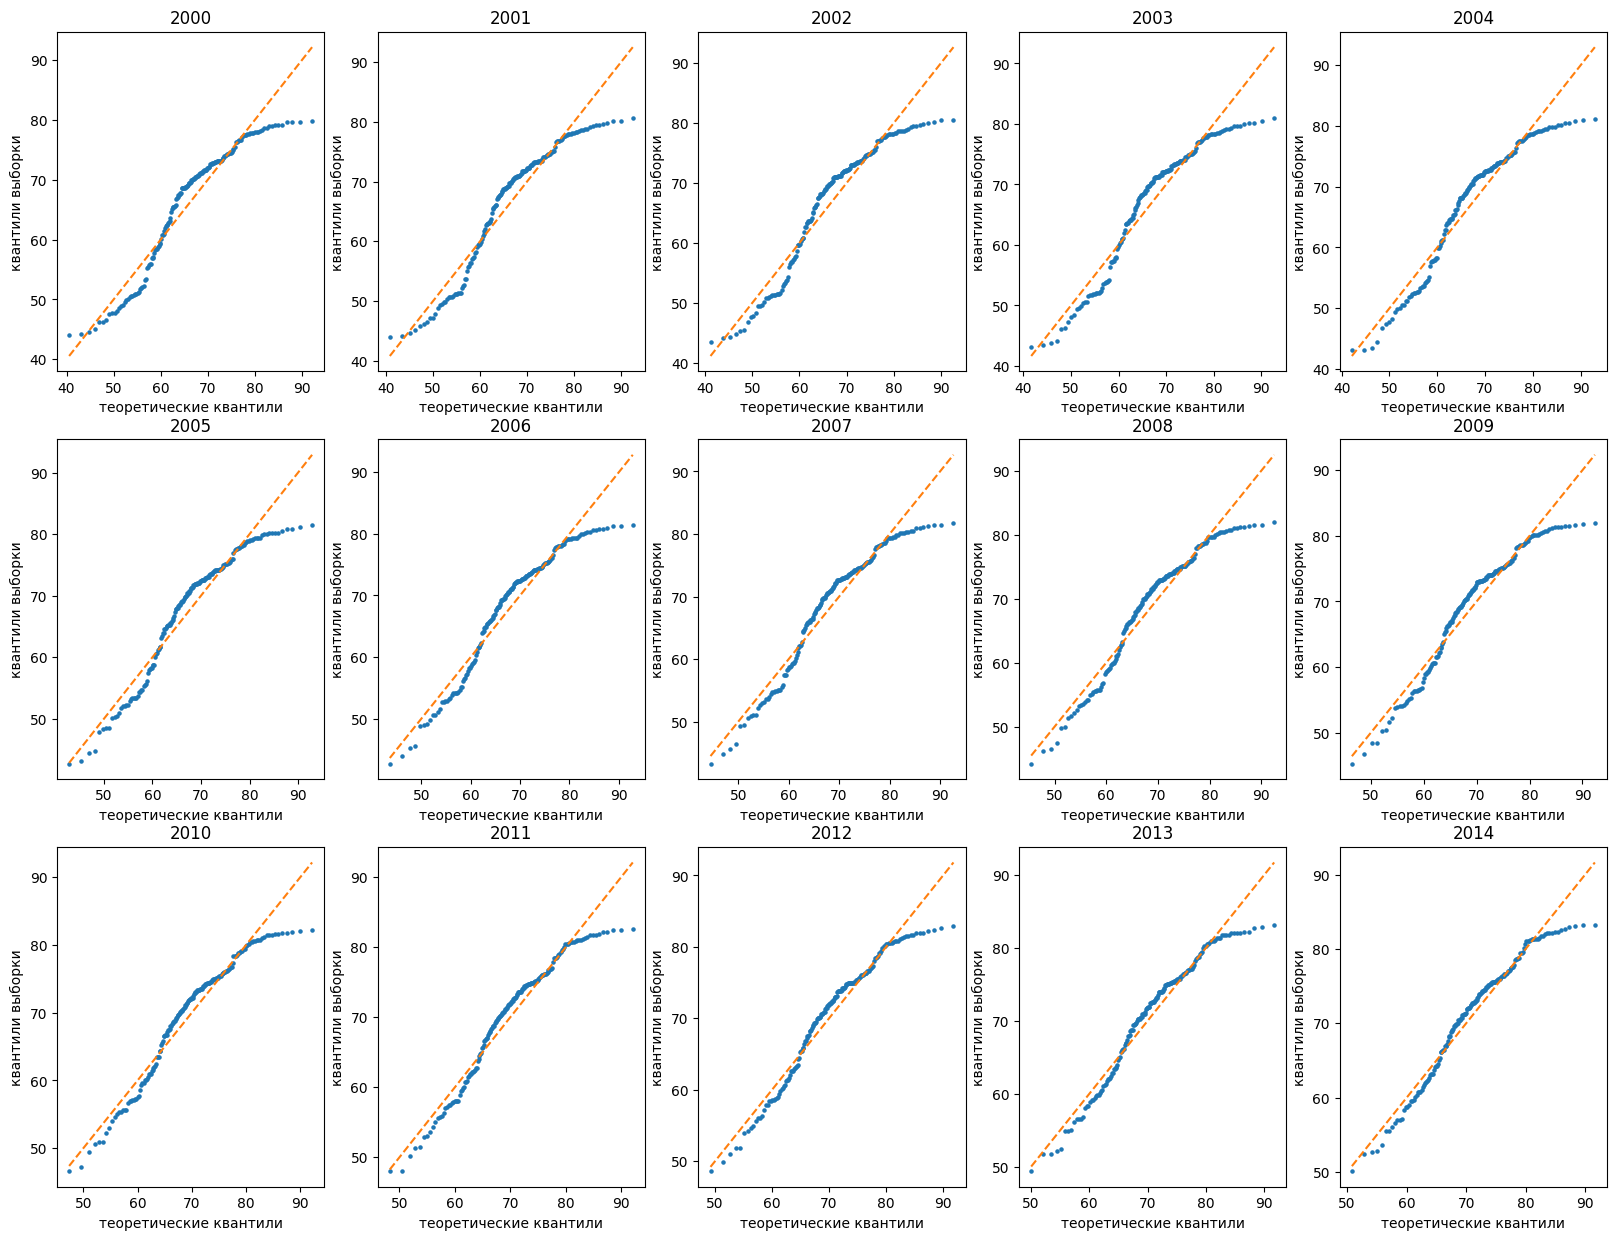

In [13]:
fig, axex = plt.subplots(3, 5)
fig.set_size_inches(20, 15)
years = df.Year.unique()
print(sorted(list(years)))
for s, ax in zip(sorted(list(years)), axex.flatten()):

    loc = df.loc[df['Year']==s, "Life_expectancy"].mean()
    scale = df.loc[df['Year']==s, "Life_expectancy"].std()

    interval = np.linspace(0, 1, df.loc[df['Year']==s, "Life_expectancy"].shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(df.loc[df['Year']==s, "Life_expectancy"], interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(s)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Найдем теоретические средние и наши получившиеся отклонения по правилу трех сигм

In [14]:
loc = norm.mean()
scale = norm.std()

for i in range(1, 4):
    true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
    sample_value = ((norm >= loc - i * scale) & (norm <= loc + i * scale)).sum() / norm.shape[0]
    
    print(f'Сигма {i}')
    print(f'\ttheoretical:\t{true_value}')
    print(f'\tsample:\t\t{sample_value}')

Сигма 1
	theoretical:	0.6826894921370859
	sample:		0.6595670391061452
Сигма 2
	theoretical:	0.9544997361036416
	sample:		0.9574022346368715
Сигма 3
	theoretical:	0.9973002039367398
	sample:		0.9993016759776536


Text(0, 0.5, 'квантили выборки')

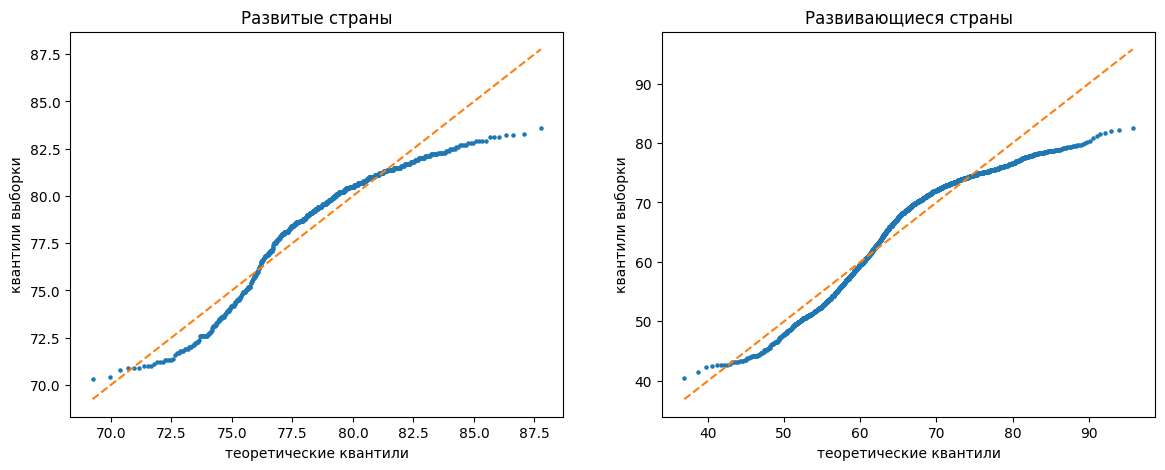

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14, 5)
norm = df.loc[df['Economy_status_Developed'] == 1, 'Life_expectancy']
loc = norm.mean()
scale = norm.std()

interval = np.linspace(0, 1, norm.shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(norm, interval)

ax[0].scatter(x, y, s=5)
ax[0].plot(x, x, color='C1', linestyle='dashed')

ax[0].set_title("Развитые страны")
ax[0].set_xlabel('теоретические квантили')
ax[0].set_ylabel('квантили выборки')

norm = df.loc[df['Economy_status_Developed'] == 0, 'Life_expectancy']
loc = norm.mean()
scale = norm.std()

interval = np.linspace(0, 1, norm.shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(norm, interval)

ax[1].scatter(x, y, s=5)
ax[1].plot(x, x, color='C1', linestyle='dashed')

ax[1].set_title("Развивающиеся страны")
ax[1].set_xlabel('теоретические квантили')
ax[1].set_ylabel('квантили выборки')

По итогу, распределение средней продолжительности по странам - нормальное, причем с каждым годом график становится более нормальным.

### Посмотрим зависимости по регионам

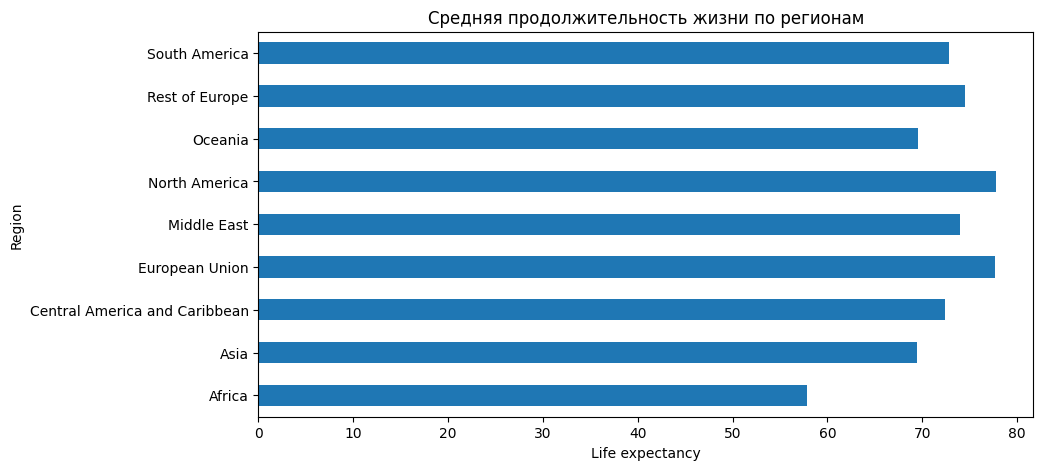

In [16]:
avg = df.groupby('Region').Life_expectancy.mean()
avg.columns =['Region', 'Life Expectancy']
fig = plt.figure(figsize=(10, 5))
avg.plot(kind="barh")
plt.xlabel("Life expectancy")
plt.title("Средняя продолжительность жизни по регионам")
plt.show()

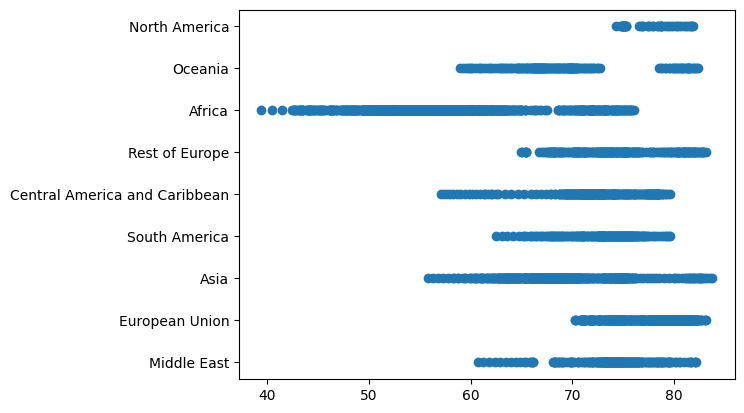

In [17]:
plt.scatter(df['Life_expectancy'], df['Region'])
plt.show()

Text(0.5, 1.0, 'Средняя продолжительность жизни по регионам за 2000-2015 года')

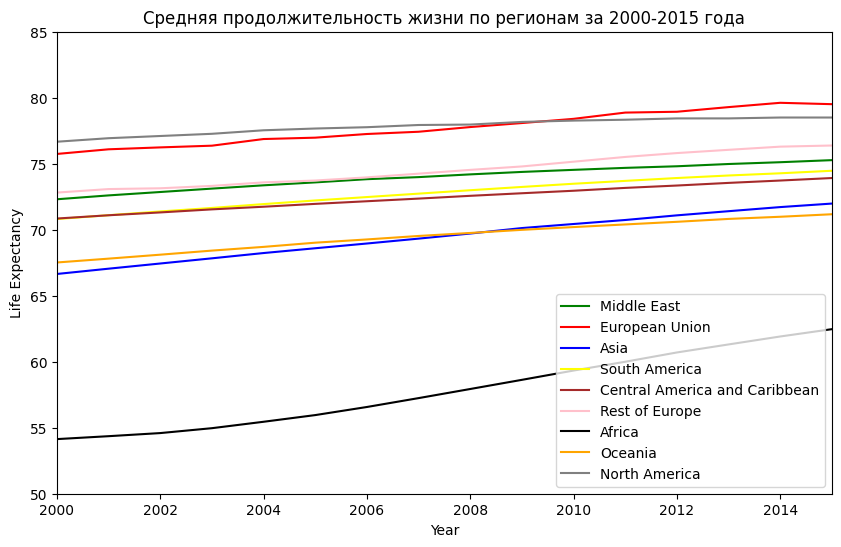

In [18]:
sorted = df.sort_values(by='Year')
colors = ['green', 'red', 'blue', 'yellow', 'brown', 'pink', 'black', 'orange', 'grey']
regs = (df['Region'].unique())
i = 0
fig = plt.figure(figsize=(10, 6))
for s in (regs):
    region = sorted.loc[sorted['Region'] == s, ['Year', 'Life_expectancy']].groupby('Year')['Life_expectancy'].mean()
    plt.plot(region, colors[i])
    i+=1
plt.xlim(2000, 2015)
plt.ylim(50, 85)
plt.margins(0.2)
plt.xlabel('Year') 
plt.ylabel('Life Expectancy')
plt.legend(regs, loc ="lower right")
plt.title('Средняя продолжительность жизни по регионам за 2000-2015 года')


## Гипотеза

### Средняя продолжительность жизни сильно связана с уровнем ВВП на душу населения

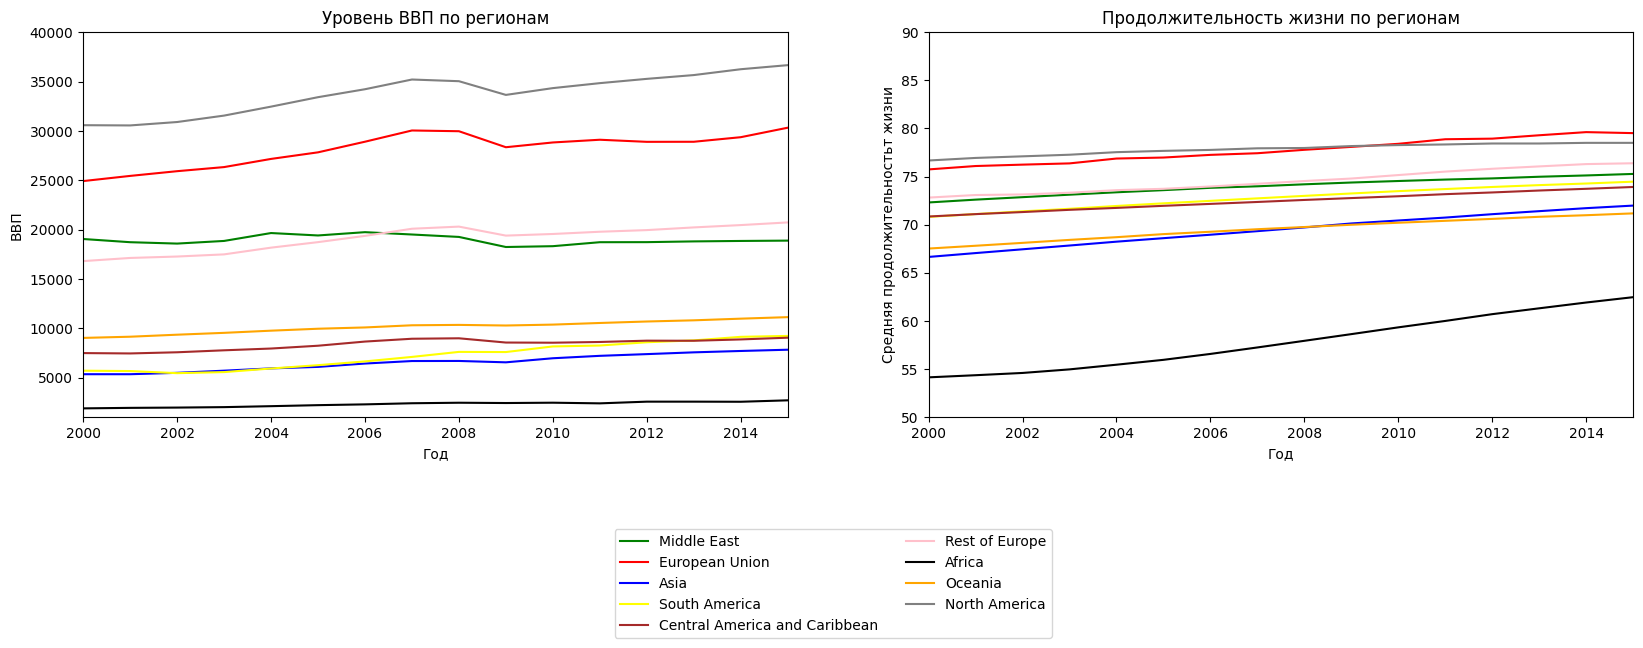

In [19]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 5)
norm = df.loc[df['Economy_status_Developed'] == 1, 'Life_expectancy']
loc = norm.mean()
scale = norm.std()
i=0

for s in (regs):
    region = sorted.loc[sorted['Region'] == s, ['Year', 'GDP_per_capita']].groupby('Year')['GDP_per_capita'].mean()
    ax[0].plot(region, colors[i])
    i+=1
ax[0].set_xlim(2000, 2015)
ax[0].set_ylim(1000, 40000)
ax[0].margins(0.2)
ax[0].set_xlabel('Year') 
ax[0].set_ylabel('Life Expectancy')
ax[0].set_title('Средняя продолжительность жизни по регионам за 2000-2015 года')



ax[0].scatter(x, y, s=5)
ax[0].plot(x, x, color='C1', linestyle='dashed')

ax[0].set_title("Уровень ВВП по регионам")
ax[0].set_xlabel('Год')
ax[0].set_ylabel('ВВП')

i=0

for s in (regs):
    region = sorted.loc[sorted['Region'] == s, ['Year', 'Life_expectancy']].groupby('Year')['Life_expectancy'].mean()
    ax[1].plot(region, colors[i])
    i+=1
ax[1].set_xlim(2000, 2015)
ax[1].set_ylim(50, 90)
ax[1].margins(0.2)
ax[1].set_xlabel('Year') 
ax[1].set_ylabel('Life Expectancy')
ax[1].set_title('Средняя продолжительность жизни по регионам за 2000-2015 года')



ax[1].scatter(x, y, s=5)
ax[1].plot(x, x, color='C1', linestyle='dashed')

ax[1].set_title("Продолжительность жизни по регионам")
ax[1].set_xlabel('Год')
ax[1].set_ylabel('Средняя продолжительностьт жизни')
fig.legend(regs, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

### Выводы :

* Разница между средней средней (извините) продолжительностю жизни уменьшается с каждым годом, а между медианной остается на том же уровне.

* Потребление алкоголя - прямой коррелят уровня жизни в неразвитых странах и обратный в развитых.

* С каждым годом средняя продолжительность жизни становится более нормальным. В мире становится все меньше стран, с сильно упавшей продолжительностью жизни

* В некоторых случаях, ввп действительно не является ключевым фактором продолжительности жизни. Например несмотря на то, разница в уровне ввп между Европой и Северной Америкой не изменился, Европа стала "жить" в среднем дольше северной Америки. Еще пример, южная Америка обладая одним из самых низких ввп на душу населения, неплохо смотрится на графике средней продолжительности жизни.